#Synthesis of RNA sequences similar to given noncoding-RNA families



In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import logging
from eden.util import configure_logging
configure_logging(logging.getLogger(), verbosity=2, filename=None)

In [9]:
from rnasynth.rna_synthesizer import RNASynthesizerInitializer
synthesizer = RNASynthesizerInitializer(instance_score_threshold_in=0.5,
                                        instance_score_threshold_out=1.0,
                                        min_size_connected_component_sequence_constraint=3,
                                        importance_threshold_sequence_constraint=-0.9,
                                        min_size_connected_component_structure_constraint=3,
                                        importance_threshold_structure_constraint=-0.9,
                                        n_synthesized_seqs_per_seed_seq=2,
                                        vectorizer_complexity=3,
                                        max_num=5,
                                        negative_shuffle_ratio=5
                                       ).synthesizer

Instantiated an instance of AntaRNAv117Designer.
Created a PreProcessor object.
Instantiated an RNASynth object.
{'_instance_score_threshold_in': 0.5, 'designer': <rnasynth.rna_designer.AntaRNAv117Designer object at 0x10831a290>, 'constraint_extractor': <rnasynth.constraint_extractor.ConstraintExtractor instance at 0x105b89518>, '_n_jobs': -1, '_n_iter_search': 1, 'pre_processor': <rnasynth.rna_synthesizer.PreProcessor object at 0x10822ac90>, '_shuffle_order': 2, '_negative_shuffle_ratio': 5, 'estimator': SGDClassifier(alpha=0.0001, average=True, class_weight='auto', epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False), '_instance_score_threshold_out': 1.0, '_cv': 3, 'vectorizer': graph.Vectorizer( r = 3, d = 3, n = 1, min_r = 0, min_d = 0, min_n = 2,                          label_size = 1, nbits = 20, stat

In [10]:
from evaluation.performance_evaluation import learning_curve

In [15]:
params = {'rfam_id':'RF02275',
          'n_experiment_repetitions':2,
          'train_to_test_split_ratio':0.2,
          'data_fraction_lower_bound':0.5,
          'data_fraction_upper_bound':0.9,
          'data_fraction_chunks':3,
          'shuffle_order':2,
          'negative_shuffle_ratio':2,
          'vectorizer_complexity':2}     

In [16]:
roc_t, roc_s, apr_t, apr_s, data_fractions = learning_curve(params, synthesizer=synthesizer)

[0.5, 0.69999999999999996, 0.90000000000000002]
Starting RNA Synthesis experiment for RF02275 ...
Starting new HTTP connection (1): rfam.xfam.org
"GET /family/RF02275/alignment?acc=RF02275&format=fastau&download=0 HTTP/1.1" 200 3418
Training on data chunk 0/3 (data fraction: 0.5)
--------------------------------------------------------------------------------
run 1/2
Fit estimator on original data and evaluate the estimator.
Positive data: Instances: 3 ; Features: 1048577 with an avg of 537 features per instance
Negative data: Instances: 6 ; Features: 1048577 with an avg of 553 features per instance
Elapsed time: 0.4 secs
Test set
Instances: 39 ; Features: 1048577 with an avg of 549 features per instance
--------------------------------------------------------------------------------
Test Estimate
             precision    recall  f1-score   support

         -1       0.93      1.00      0.96        26
          1       1.00      0.85      0.92        13

avg / total       0.95      0.

---

In [17]:
print roc_t, roc_s, apr_t, apr_s

[[0.99999999999999978, 0.99999999999999978], [1.0000000000000002, 1.0000000000000002], [0.99999999999999978, 0.99999999999999978]] [[0.99999999999999978, 0.99999999999999978], [1.0000000000000002, 1.0000000000000002], [0.99999999999999978, 0.99999999999999978]] [[1.0, 1.0], [1.0, 1.0], [1.0, 1.0]] [[1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]


In [18]:
from evaluation.draw_utils import draw_learning_curve

delta = 0.005
scaling = 50

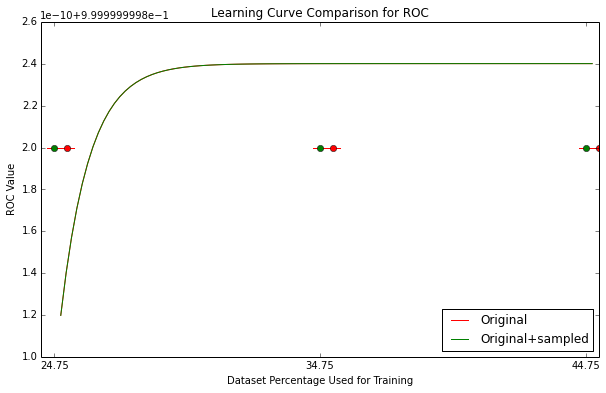

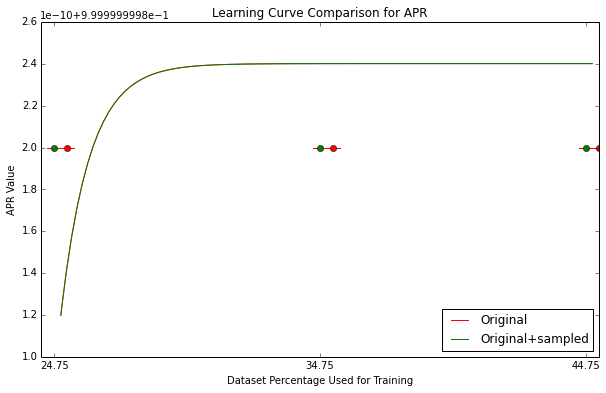

In [19]:
draw_learning_curve(data_a=roc_t, data_b=roc_s, x=data_fractions, measure='ROC', delta=delta, scaling=scaling)
draw_learning_curve(data_a=apr_t, data_b=apr_s, x=data_fractions, measure='APR', delta=delta, scaling=scaling)